In [504]:
import pandas as pd
import numpy as np

In [505]:
df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [506]:
df.review[0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [508]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [509]:
df.duplicated().sum()

418

In [510]:
df.drop_duplicates(['review'],inplace=True)


In [511]:
df.shape

(49582, 2)

In [512]:
df.sentiment.value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

## ***Text Preprocessing***

####  Lowercasing

In [513]:
df['review']=df['review'].str.lower()
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


####  Removing Emoji

In [514]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [515]:
import emoji


In [516]:
def demoji(txt):
    return emoji.demojize(txt)

In [517]:
df['review']=df['review'].apply(demoji)

#### Removing Contraction

In [518]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [519]:
import contractions

In [520]:
def replace_contractions(text):
    return " ".join([contractions.fix(word) for word in text.split()])

In [521]:
df['review']=df['review'].apply(replace_contractions)

In [522]:
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. them city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to th

####  Removing HTML Tags

In [523]:
import re

In [524]:
def remove_HTML(txt):
    pattern=re.compile('<.*?>')
    return re.sub(pattern,' ',txt)

In [525]:
df['review']=df['review'].apply(remove_HTML)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming t...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


In [526]:
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. them city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where othe

#### 4. Remove Url's tags

In [527]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')   
    return re.sub(url_pattern, ' ', text)

In [528]:
df['review']=df['review'].apply(remove_urls)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming t...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


#### 5.Remove Punctuation

In [529]:
import string

punctuation_set = set()

for text in df['review']:
    punctuation_set.update([char for char in text if char in string.punctuation])

punctuation_set


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [530]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [531]:
def remove_punc(text):
    trans_table=str.maketrans('','','!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')   
    return text.translate(trans_table)

In [532]:
df['review']=df['review'].apply(remove_punc)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming te...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i am going to have to disagree with the previo...,negative


#### 6 .Removing StopWords

In [533]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


def remove_stopwords(text):
    stopwords_list = set(stopwords.words('english'))  # Assuming English language
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [534]:
df['review']=df['review'].apply(remove_stopwords)


In [535]:
df.review[0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due l

Lemmetization

In [536]:
import nltk

In [537]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

def lemmetizer(txt):
  tokens=nltk.word_tokenize(txt)
  return " ".join([wnl.lemmatize(token,pos='v') for token in tokens])      



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [538]:
df['review']=df['review'].apply(lemmetizer)


In [539]:
corpus=[]
for i in df.review:
    corpus.append(i)


In [540]:
txt=" ".join(corpus)


In [541]:
words=txt.split()

In [542]:
from collections import Counter

In [543]:
word_freq=Counter(words)
most_common_word_freq = word_freq.most_common(50)

In [544]:
most_common_word_freq

[('film', 93300),
 ('movie', 84549),
 ('one', 51093),
 ('make', 43892),
 ('like', 42818),
 ('see', 40762),
 ('get', 35282),
 ('would', 30810),
 ('time', 30383),
 ('good', 28710),
 ('character', 27749),
 ('go', 27422),
 ('watch', 27309),
 ('even', 24853),
 ('think', 23923),
 ('really', 22840),
 ('story', 22370),
 ('show', 21421),
 ('well', 19375),
 ('look', 19179),
 ('say', 19001),
 ('much', 18944),
 ('know', 18718),
 ('end', 18574),
 ('could', 18372),
 ('people', 18079),
 ('great', 17809),
 ('bad', 17809),
 ('also', 17733),
 ('give', 17197),
 ('take', 17076),
 ('first', 17057),
 ('act', 16875),
 ('love', 16844),
 ('play', 16833),
 ('come', 16236),
 ('find', 15745),
 ('movies', 15631),
 ('way', 15369),
 ('seem', 14002),
 ('work', 13386),
 ('want', 13356),
 ('many', 13305),
 ('plot', 13196),
 ('two', 12968),
 ('never', 12786),
 ('best', 12384),
 ('try', 12346),
 ('little', 12242),
 ('life', 11911)]

In [545]:
most_common_words=[word for word,freq in most_common_word_freq]
most_common_words

['film',
 'movie',
 'one',
 'make',
 'like',
 'see',
 'get',
 'would',
 'time',
 'good',
 'character',
 'go',
 'watch',
 'even',
 'think',
 'really',
 'story',
 'show',
 'well',
 'look',
 'say',
 'much',
 'know',
 'end',
 'could',
 'people',
 'great',
 'bad',
 'also',
 'give',
 'take',
 'first',
 'act',
 'love',
 'play',
 'come',
 'find',
 'movies',
 'way',
 'seem',
 'work',
 'want',
 'many',
 'plot',
 'two',
 'never',
 'best',
 'try',
 'little',
 'life']

In [546]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

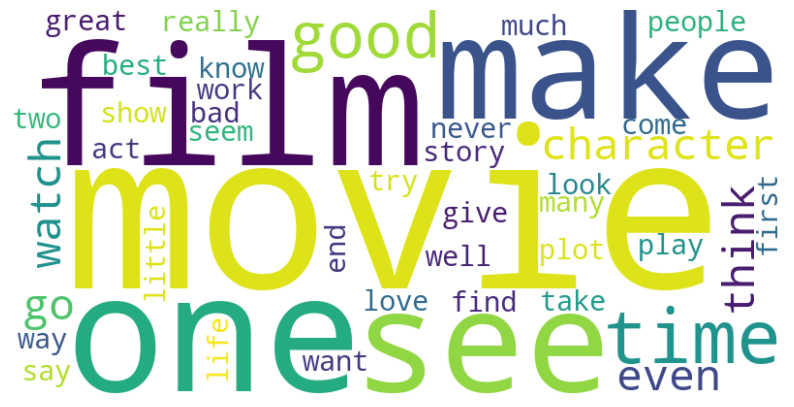

In [547]:

inp_text=' '.join(most_common_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(inp_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [548]:
l1=[]
l2=[]
for i,j in most_common_word_freq:
    l1.append(i)
    l2.append(j)


In [549]:
Most_common_words_df=pd.DataFrame(most_common_word_freq,columns=['word','freq'])

In [550]:
Most_common_words_df.head()

,word,freq
0,film,93300
1,movie,84549
2,one,51093
3,make,43892
4,like,42818


In [551]:
import plotly.express as px


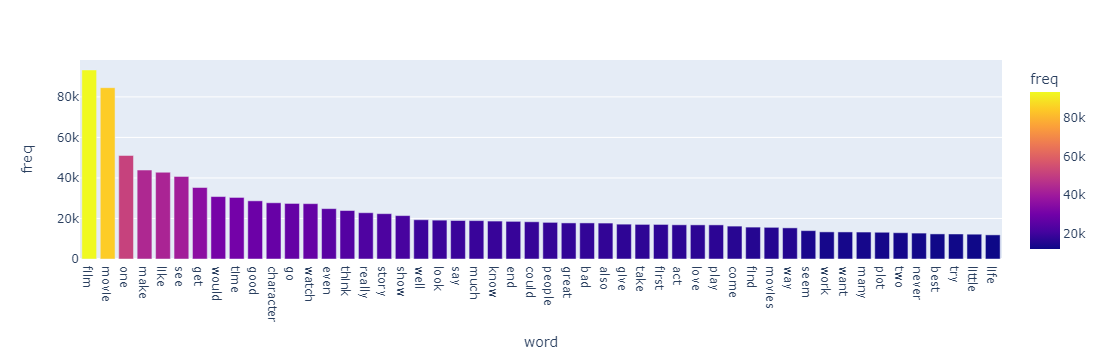

In [552]:
fig=px.bar(Most_common_words_df,x='word',y='freq',color='freq')
fig.show()

In [553]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [554]:
import gensim 
import os
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [555]:
from nltk.tokenize import word_tokenize
tokenized_reviews = df['review'].apply(word_tokenize)


In [556]:
model=Word2Vec(window=10,min_count=5) 

In [557]:
model.build_vocab(tokenized_reviews)

In [558]:
model.train(tokenized_reviews,total_examples=model.corpus_count,epochs=model.epochs)


(26736822, 29350320)

In [559]:
len(model.wv.index_to_key)

35606

In [560]:
# to convert the complete review in vectoer
def dec_vector(doc):
    doc=[word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc],axis=0)
    

In [561]:
model.wv.index_to_key

['film',
 'movie',
 'one',
 'make',
 'like',
 'see',
 'get',
 'would',
 'time',
 'good',
 'character',
 'go',
 'watch',
 'even',
 'think',
 'really',
 'story',
 'show',
 'well',
 'look',
 'say',
 'much',
 'know',
 'end',
 'could',
 'people',
 'great',
 'bad',
 'also',
 'give',
 'take',
 'first',
 'act',
 'love',
 'play',
 'come',
 'find',
 'movies',
 'way',
 'seem',
 'work',
 'want',
 'many',
 'plot',
 'two',
 'never',
 'best',
 'try',
 'little',
 'life',
 'ever',
 'better',
 'man',
 'still',
 'scene',
 'scenes',
 'feel',
 'part',
 'something',
 'use',
 'can',
 'lot',
 'back',
 'not',
 'interest',
 'us',
 'real',
 'guy',
 'thing',
 'actors',
 'years',
 'though',
 'cast',
 'funny',
 'another',
 'leave',
 'actually',
 'live',
 'nothing',
 'tell',
 'start',
 'star',
 'new',
 'every',
 'old',
 'point',
 'write',
 'become',
 'director',
 'turn',
 'set',
 'things',
 'kill',
 'quite',
 'pretty',
 'happen',
 'around',
 'world',
 'young',
 'however',
 'mean',
 'enough',
 'fact',
 'right',
 'hor

In [562]:
X=[] 
for doc in df.review:
    X.append(doc_vector(doc))
X
    

[array([ 0.20910127,  0.7474893 ,  0.29789025,  0.28870258,  0.35815257,
        -0.63370496, -0.34984753,  0.1324036 , -0.08114567,  0.11009903,
        -0.37609032, -0.48270056,  0.16500601, -0.48305413,  0.12168235,
        -0.09645974,  0.09751821, -0.14745298,  0.00598664, -0.45195052,
        -0.03817876, -0.49083596,  0.3113359 , -0.09171825, -0.21886124,
         0.14036354, -0.18626739,  0.21844786, -0.01205831, -0.07809526,
         0.39736354, -0.18024205, -0.25738677,  0.16283709, -0.2815502 ,
         0.21938173, -0.05932488,  0.03664176, -0.24164411, -0.0391473 ,
        -0.0686166 , -0.03514875, -0.11265782,  0.00514327, -0.5604358 ,
        -0.56844264,  0.09888348, -0.32128626, -0.15441807, -0.0225949 ,
         0.26731005,  0.14542186,  0.35305798, -0.22079344, -0.23899049,
        -0.16473828,  0.14754048,  0.01685493, -0.73255664,  0.18032192,
         0.26829982, -0.254744  ,  0.13641031,  0.50188303,  0.18190427,
         0.27864337,  0.22504085, -0.46468362,  0.1

In [563]:
len(X)

49582

In [564]:
x=np.array(X)

In [565]:
x.shape

(49582, 100)

In [566]:
y=df.iloc[:,1]

In [567]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [568]:
y=encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [569]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#### ***Gaussian Naive Bayes***

In [570]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [571]:
gnb.fit(x_train,y_train)

GaussianNB()

In [572]:
y_pred=gnb.predict(x_test)


In [573]:
from sklearn.metrics import accuracy_score

In [574]:
print(accuracy_score(y_test,y_pred))

0.7850156297267319


#### ***Logistic Regression***

In [575]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [576]:
lg.fit(x_train,y_train)

C:\Users\lenovo\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [577]:
y_pred2=lg.predict(x_test)

In [578]:
print(accuracy_score(y_test,y_pred2))

0.8703236865987698


In [579]:
from sklearn.ensemble import RandomForestClassifier

In [580]:
rf=RandomForestClassifier()

In [581]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [582]:
y_pred3=rf.predict(x_test)

In [583]:
print(accuracy_score(y_test,y_pred3))

0.8396692548149642


#### ***ANN***

In [584]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [585]:
ann_model=Sequential()
ann_model.add(Dense(100,activation='relu',input_dim=x_train.shape[1]))
ann_model.add(Dense(50,activation='relu'))
ann_model.add(Dense(25,activation='relu'))
ann_model.add(Dense(10,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))

In [586]:
ann_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [587]:
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 25)                1275      
                                                                 
 dense_23 (Dense)            (None, 10)                260       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 16696 (65.22 KB)
Trainable params: 16696 (65.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [588]:
history=ann_model.fit(x_train,y_train,batch_size=128,epochs=12)

Epoch 1/12
310/310 [==============================] - 5s 3ms/step - loss: 0.3455 - accuracy: 0.8530
Epoch 2/12
310/310 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8707
Epoch 3/12
310/310 [==============================] - 1s 2ms/step - loss: 0.2999 - accuracy: 0.8749
Epoch 4/12
310/310 [==============================] - 1s 3ms/step - loss: 0.2932 - accuracy: 0.8773
Epoch 5/12
310/310 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8791
Epoch 6/12
310/310 [==============================] - 1s 4ms/step - loss: 0.2831 - accuracy: 0.8819
Epoch 7/12
310/310 [==============================] - 1s 3ms/step - loss: 0.2792 - accuracy: 0.8839
Epoch 8/12
310/310 [==============================] - 1s 2ms/step - loss: 0.2732 - accuracy: 0.8856
Epoch 9/12
310/310 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.8871
Epoch 10/12
310/310 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.8886

In [589]:
val_loss,val_accuracy=ann_model.evaluate(x_test,y_test)
print('val_loss',val_loss,'accuracy',val_accuracy)

310/310 [==============================] - 3s 3ms/step - loss: 0.3008 - accuracy: 0.8718
val_loss 0.30082187056541443 accuracy 0.871836245059967


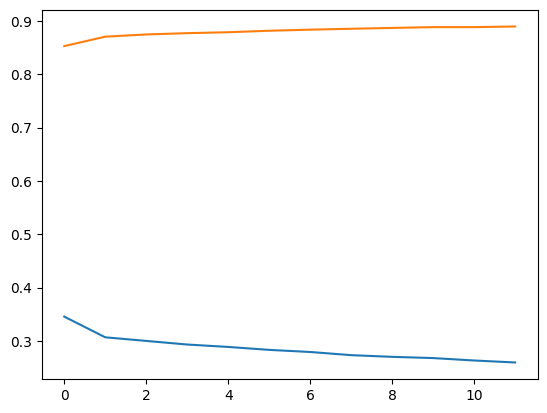

In [590]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

#### Making Prediction

In [591]:
new_df=pd.read_csv("C:\\Users\\lenovo\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv")
new_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [592]:
temp_txt='''Wasted so many years playing this. You end up staying because you spend so much time building your city up but once you get to T5 it gets very monotonous. They constantly create new gimmicks to get you to pay to keep up with the power of P2W players. You spend a year upgrading one general only to have them useless because new ones come out. It's pretty obvious all they want is you to keep spending money. It would be one thing if the game was fun but it's not. Quit while you're ahead!'''

In [593]:
temp_txt

"Wasted so many years playing this. You end up staying because you spend so much time building your city up but once you get to T5 it gets very monotonous. They constantly create new gimmicks to get you to pay to keep up with the power of P2W players. You spend a year upgrading one general only to have them useless because new ones come out. It's pretty obvious all they want is you to keep spending money. It would be one thing if the game was fun but it's not. Quit while you're ahead!"

In [594]:
inp=doc_vector(lemmetizer(remove_stopwords(remove_punc(remove_urls(remove_HTML(replace_contractions(lowercase(temp_txt)))))))).reshape(1, -1)

In [595]:
encoder.inverse_transform(lg.predict(inp))

array(['negative'], dtype=object)

In [597]:
ann_model.predict(inp)

1/1 [==============================] - 0s 241ms/step


array([[0.24070726]], dtype=float32)

In [ ]:
# probability of revi